In [1]:
import pandas as pd
import numpy as np

import re
import string

import spacy
import nltk

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
review_data= pd.read_excel('/kaggle/input/dental-book-reviews/Cleaned_Synthetic_No_Special_Characters.xlsx')
print(review_data.head(5))

   Book ID  Review ID                                       Review Title  \
0      1.0         12  Some of the figures and illustrations are defi...   
1      3.0         48                                                NaN   
2      3.0         49                                                NaN   
3      4.0         54                                                NaN   
4      4.0         64                                                NaN   

                                  Review Description  Review Rating  \
0  Some of the figures and illustrations are defi...            2.0   
1  My book came wet and ripped, looks like it was...            1.0   
2  Only giving 1 star because all the pages are s...            1.0   
3  If I could give it half a star I would. The bo...            1.0   
4  f you want to study anatomy in the "real" sens...            NaN   

   Topic of the review  Stop words extraction  \
0                  NaN                    NaN   
1                 

In [3]:
import spacy
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# 1. Preprocessing - Tokenize the text into sentences and words
def preprocess_text(text):
    sentences = sent_tokenize(text)
    return [word_tokenize(sentence) for sentence in sentences]

# Define the remove_stopwords function to work with tokenized words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent))  # Convert the list of tokens back to a string
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output

In [4]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import sent_tokenize, word_tokenize

# Load the spacy model for lemmatization
nlp = spacy.load('en_core_web_sm')

review_data['Text'] = (review_data['Review Title'].fillna('') + " " + review_data['Review Description'].fillna('')).apply(clean_text)

# Apply preprocessing to the entire dataset: tokenize -> remove stopwords
preprocessed_reviews = [preprocess_text(review) for review in review_data['Text']]

# Remove stopwords and flatten the tokenized sentences (local regions)
tokenized_reviews = [[remove_stopwords(sentence) for sentence in review] for review in preprocessed_reviews]

# Apply lemmatization to each sentence in each review
lemmatized_reviews = [lemmatization(review) for review in tokenized_reviews]

# Flatten the lemmatized reviews into individual sentences (local regions)
flat_lemmatized_reviews = [sentence for review in lemmatized_reviews for sentence in review]

# 2. Create dictionary and corpus for LocLDA
dictionary = corpora.Dictionary(flat_lemmatized_reviews)
corpus = [dictionary.doc2bow(sentence) for sentence in flat_lemmatized_reviews]

# 3. Apply LDA model to the local regions
num_topics = 10  # Set the number of topics you want
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100)

# 4. Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.027*"sil" + 0.019*"berie" + 0.016*"great" + 0.016*"book" + 0.012*"anatomy" + 0.010*"good" + 0.010*"practice" + 0.009*"study" + 0.007*"real" + 0.006*"character"
Topic 1: 0.043*"book" + 0.029*"good" + 0.019*"great" + 0.019*"test" + 0.012*"practice" + 0.011*"textbook" + 0.011*"section" + 0.010*"study" + 0.010*"information" + 0.008*"helpful"
Topic 2: 0.075*"book" + 0.048*"dental" + 0.019*"great" + 0.018*"practice" + 0.011*"helpful" + 0.011*"information" + 0.009*"good" + 0.009*"student" + 0.008*"review" + 0.007*"business"
Topic 3: 0.025*"book" + 0.017*"structure" + 0.014*"star" + 0.013*"student" + 0.013*"dental" + 0.011*"read" + 0.010*"cadaver" + 0.009*"anatomical" + 0.009*"good" + 0.009*"medical"
Topic 4: 0.051*"book" + 0.025*"good" + 0.013*"information" + 0.012*"dental" + 0.012*"text" + 0.010*"student" + 0.008*"anatomy" + 0.008*"class" + 0.008*"nice" + 0.008*"professional"
Topic 5: 0.052*"dental" + 0.026*"book" + 0.017*"practice" + 0.014*"office" + 0.014*"great" + 0.010*"inform

In [5]:
print(flat_lemmatized_reviews)

[['figure', 'deficient', 'book', 'format', 'figure', 'deficient', 'book', 'format'], ['book', 'look', 'version', 'cover', 'little', 'worn', 'page'], ['star', 'page', 'book', 'book', 'cadaver', 'room', 'cadaver', 'sticky', 'greasy', 'page', 'book', 'able', 'book', 'glove', '™', 'money'], ['half', 'star', 'book', 'first', 'hour', 'bearable', 'entire', 'book', 'loose', 'sheet', 'paper', 'anatomy', 'poor', 'design', 'publisher', 'little', 'rectify', 'issue', 'similar', 'past', 'comment'], ['study', 'anatomy', 'real', 'sense', 'elegant', 'cartoonish', 'image', 'netter'], ['book', 'fantastic', 'photo', 'phenomenal', 'real', 'good', 'example', 'human', 'anatomy', 'page', 'book', 'good', 'hold', 'time', 'open', 'book', 'chapter', 'chunk', 'page'], ['great', 'endeavor', 'catalog', 'public', 'human', 'body', 'vital', 'fraction', 'whole', 'whole', 'enterprise', 'cadaver', 'formaldehyde', 'medical', 'artistic', 'purpose', 'result', 'catastrophic', 'doctor', 'embalmingdisfigured', 'donor', 'utter',

In [6]:
tokenized_reviews = flat_lemmatized_reviews

dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [7]:
lda_model.print_topics()

[(0,
  '0.034*"berie" + 0.032*"sil" + 0.018*"book" + 0.016*"story" + 0.016*"moore" + 0.015*"friend" + 0.014*"character" + 0.013*"much" + 0.012*"great" + 0.012*"atlas"'),
 (1,
  '0.049*"book" + 0.043*"great" + 0.022*"study" + 0.020*"good" + 0.015*"helpful" + 0.014*"textbook" + 0.013*"tool" + 0.013*"format" + 0.011*"system" + 0.011*"important"'),
 (2,
  '0.076*"dental" + 0.064*"book" + 0.042*"practice" + 0.017*"great" + 0.016*"business" + 0.014*"field" + 0.013*"team" + 0.012*"professional" + 0.011*"robinson" + 0.010*"patient"'),
 (3,
  '0.079*"student" + 0.028*"anatomy" + 0.024*"medical" + 0.024*"book" + 0.020*"class" + 0.020*"text" + 0.016*"structure" + 0.015*"online" + 0.015*"cover" + 0.014*"resource"'),
 (4,
  '0.087*"book" + 0.048*"good" + 0.030*"quality" + 0.027*"information" + 0.018*"content" + 0.017*"great" + 0.016*"orthodontic" + 0.015*"paper" + 0.015*"dental" + 0.015*"helpful"'),
 (5,
  '0.047*"dental" + 0.034*"anatomy" + 0.030*"great" + 0.024*"nurse" + 0.023*"book" + 0.019*"inf

In [8]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.057606 -0.066292       1        1  19.660435
7      0.070412 -0.067829       2        1  17.102909
6      0.110005  0.005915       3        1  11.980456
8      0.046707 -0.012584       4        1  10.726697
0      0.027040  0.294478       5        1   8.504147
1      0.019391 -0.034717       6        1   8.061118
9      0.101416 -0.012774       7        1   7.225343
5     -0.109519 -0.064416       8        1   6.373423
3     -0.267035  0.029678       9        1   5.531969
4      0.059187 -0.071459      10        1   4.833502, topic_info=        Term         Freq        Total Category  logprob  loglift
47      good   328.000000   328.000000  Default  30.0000  30.0000
135   dental   484.000000   484.000000  Default  29.0000  29.0000
212  student    96.000000    96.000000  Default  28.0000  28.0000
0       book  1331.000000  1331.000000  Default  27.0000  27.0000
72     great   351.000000   351.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
107     text     7.289959    65.074008  Topic10  -4.8283   0.8406
124    price     6.005284    34.395923  Topic10  -5.0221   1.2843
192  dentist     6.377591    82.408635  Topic10  -4.9620   0.4707
160     read     6.152128   112.134900  Topic10  -4.9980   0.1267
134   course     5.619065    83.085477  Topic10  -5.0886   0.3359

[636 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1230      5  0.842847  abortion
1787      1  0.291208  absolute
1787      3  0.072802  absolute
1787      8  0.582416  absolute
215       4  0.255660    access
...     ...       ...       ...
471       8  0.710695         °
18        1  0.145098         ™
18        2  0.181372         ™
18        4  0.507842         ™
18        6  0.145098         ™

[1067 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 7, 9, 1, 2, 10, 6, 4, 5])

In [9]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.286544997699306

Coherence Score:  0.36885005101613133


In [10]:
# Method to find optimal number of topics Code from:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [11]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

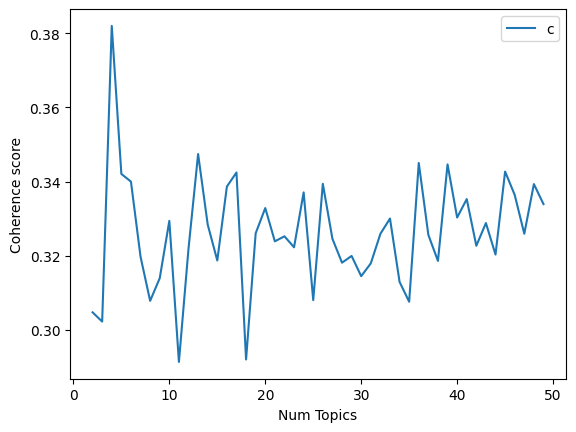

Num Topics = 2  has Coherence Value of 0.3047
Num Topics = 3  has Coherence Value of 0.3022
Num Topics = 4  has Coherence Value of 0.382
Num Topics = 5  has Coherence Value of 0.342
Num Topics = 6  has Coherence Value of 0.34
Num Topics = 7  has Coherence Value of 0.3197
Num Topics = 8  has Coherence Value of 0.3078
Num Topics = 9  has Coherence Value of 0.3139
Num Topics = 10  has Coherence Value of 0.3294
Num Topics = 11  has Coherence Value of 0.2913
Num Topics = 12  has Coherence Value of 0.3219
Num Topics = 13  has Coherence Value of 0.3474
Num Topics = 14  has Coherence Value of 0.3284
Num Topics = 15  has Coherence Value of 0.3187
Num Topics = 16  has Coherence Value of 0.3386
Num Topics = 17  has Coherence Value of 0.3424
Num Topics = 18  has Coherence Value of 0.2919
Num Topics = 19  has Coherence Value of 0.326
Num Topics = 20  has Coherence Value of 0.3328
Num Topics = 21  has Coherence Value of 0.3238
Num Topics = 22  has Coherence Value of 0.3252
Num Topics = 23  has Coher

In [12]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [17]:
# Select the model and print the topics
optimal_model = model_list[11]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.046*"book" + 0.018*"dental" + 0.016*"excellent" + 0.012*"material" + 0.011*"page" + 0.011*"sedation" + 0.009*"patient" + 0.009*"orthodontic" + 0.008*"good" + 0.007*"review"'),
 (1,
  '0.096*"book" + 0.032*"good" + 0.026*"great" + 0.013*"page" + 0.013*"dental" + 0.011*"information" + 0.010*"school" + 0.009*"worth" + 0.009*"star" + 0.007*"detailed"'),
 (2,
  '0.055*"great" + 0.038*"book" + 0.020*"student" + 0.019*"read" + 0.017*"practice" + 0.014*"dentist" + 0.010*"page" + 0.009*"helpful" + 0.009*"good" + 0.009*"easy"'),
 (3,
  '0.098*"book" + 0.025*"good" + 0.017*"dental" + 0.014*"great" + 0.011*"section" + 0.010*"test" + 0.010*"review" + 0.009*"helpful" + 0.008*"practice" + 0.007*"dentist"'),
 (4,
  '0.071*"book" + 0.027*"dental" + 0.025*"anatomy" + 0.012*"page" + 0.011*"great" + 0.010*"time" + 0.009*"helpful" + 0.009*"good" + 0.008*"nice" + 0.008*"practice"'),
 (5,
  '0.044*"book" + 0.026*"good" + 0.019*"great" + 0.013*"story" + 0.013*"student" + 0.012*"read" + 0.012*"perfec

In [18]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.067625 -0.019851       1        1  17.319129
3      0.035091 -0.003054       2        1  16.325207
8      0.093037  0.002973       3        1  10.334440
9     -0.041083 -0.066914       4        1   7.468702
4      0.014330 -0.010107       5        1   7.247978
11     0.038145 -0.001674       6        1   6.762200
6     -0.211746  0.003345       7        1   6.098864
1      0.034514  0.009329       8        1   5.735037
7      0.022149 -0.134932       9        1   5.395136
2      0.061767  0.111152      10        1   4.830773
12    -0.067325  0.049045      11        1   4.751593
0     -0.018955  0.013464      12        1   4.026726
5     -0.027549  0.047224      13        1   3.704215, topic_info=             Term         Freq        Total Category  logprob  loglift
72          great   313.000000   313.000000  Default  30.0000  30.0000
0            book  1264.000000  1264.000000  Default  29.0000  29.0000
135        dental   462.000000   462.000000  Default  28.0000  28.0000
47           good   323.000000   323.000000  Default  27.0000  27.0000
1001        berie    78.000000    78.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
77        patient     2.672051    72.356173  Topic13  -5.5658  -0.0031
372         clear     2.440252    37.240304  Topic13  -5.6566   0.5704
115   information     2.591503   150.311392  Topic13  -5.5964  -0.7648
549         field     2.475484    52.460024  Topic13  -5.6422   0.2421
193      practice     2.560160   220.821029  Topic13  -5.6086  -1.1616

[937 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1230      4  0.085453  abortion
1230      5  0.085453  abortion
1230      7  0.598168  abortion
1230     11  0.085453  abortion
455      10  0.705567    absent
...     ...       ...       ...
1538      8  0.386261      ziff
2321      7  0.879228         ©
471       1  0.455178         °
471      11  0.455178         °
1904      5  0.584092     â€œgo

[2414 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 4, 9, 10, 5, 12, 7, 2, 8, 3, 13, 1, 6])